<a href="https://colab.research.google.com/github/Aditya089081/DATA-SCIENCE-TOOLBOX-PYTHON-PROGRAMMING/blob/main/Parking_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import required libraries
import pandas as pd

# STEP 2: Load the Excel file
file_path = '/content/car_parking_dataset.xlsx'  # Adjust if needed
df = pd.read_excel(file_path)

# STEP 3: Display the first few rows
print("✅ Dataset Preview:")
print(df.head())


✅ Dataset Preview:
   Entry_ID Vehicle_Number Vehicle_Type           Entry_Time  \
0         1     KA76GH9472          SUV  2025-03-26 15:46:00   
1         2     TN16AB5030        Truck  2025-01-17 06:03:00   
2         3     DL82EF5507          SUV  2025-01-19 14:10:00   
3         4     TN21GH9009          Car  2025-02-23 07:43:00   
4         5     TN78CD9741          Car  2025-02-07 07:11:00   

             Exit_Time  Duration_Minutes Parking_Slot Parking_Level  \
0  2025-03-26 23:45:00               479     SLOT-150            L1   
1  2025-01-17 07:14:00                71     SLOT-495            B2   
2  2025-01-19 20:48:00               398     SLOT-393             G   
3  2025-02-23 09:47:00               124      SLOT-27            B1   
4  2025-02-07 13:11:00               360       SLOT-3            B2   

  Payment_Status  Amount_Charged  
0           Paid           335.3  
1           Paid            71.0  
2           Paid           278.6  
3           Paid            6

In [2]:
# STEP 4: Check for basic information
print("🧾 Dataset Info:")
print(df.info())

# STEP 5: Check for missing values
print("🕳️ Missing Values:")
print(df.isnull().sum())

# STEP 6: Drop rows with missing values (if any)
df.dropna(inplace=True)

# STEP 7: Check for duplicates and drop them
df.drop_duplicates(inplace=True)

# STEP 8: Convert 'timestamp' column to datetime (if it exists)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# STEP 9: Ensure column types (like ID as string)
if 'parking_lot_id' in df.columns:
    df['parking_lot_id'] = df['parking_lot_id'].astype(str)

# STEP 10: Final structure after cleaning
print("✅ Cleaned Dataset Info:")
print(df.info())
print(df.head())


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entry_ID          10000 non-null  int64  
 1   Vehicle_Number    10000 non-null  object 
 2   Vehicle_Type      10000 non-null  object 
 3   Entry_Time        10000 non-null  object 
 4   Exit_Time         10000 non-null  object 
 5   Duration_Minutes  10000 non-null  int64  
 6   Parking_Slot      10000 non-null  object 
 7   Parking_Level     10000 non-null  object 
 8   Payment_Status    10000 non-null  object 
 9   Amount_Charged    10000 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB
None
🕳️ Missing Values:
Entry_ID            0
Vehicle_Number      0
Vehicle_Type        0
Entry_Time          0
Exit_Time           0
Duration_Minutes    0
Parking_Slot        0
Parking_Level       0
Payment_Status      0
Amount_Charged      0
dtyp

In [6]:
print(df.columns.tolist())


['Entry_ID', 'Vehicle_Number', 'Vehicle_Type', 'Entry_Time', 'Exit_Time', 'Duration_Minutes', 'Parking_Slot', 'Parking_Level', 'Payment_Status', 'Amount_Charged']


In [7]:
# Convert Entry_Time and Exit_Time to datetime
df['Entry_Time'] = pd.to_datetime(df['Entry_Time'])
df['Exit_Time'] = pd.to_datetime(df['Exit_Time'])

# Extract features from Entry_Time
df['entry_hour'] = df['Entry_Time'].dt.hour
df['entry_day_of_week'] = df['Entry_Time'].dt.dayofweek
df['is_weekend_entry'] = df['entry_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Optional: Do the same for Exit_Time
df['exit_hour'] = df['Exit_Time'].dt.hour
df['exit_day_of_week'] = df['Exit_Time'].dt.dayofweek
df['is_weekend_exit'] = df['exit_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Preview updated dataframe
df[['Entry_Time', 'entry_hour', 'entry_day_of_week', 'is_weekend_entry']].head()


,Entry_Time,entry_hour,entry_day_of_week,is_weekend_entry
0,2025-03-26 15:46:00,15,2,0
1,2025-01-17 06:03:00,6,4,0
2,2025-01-19 14:10:00,14,6,1
3,2025-02-23 07:43:00,7,6,1
4,2025-02-07 07:11:00,7,4,0


In [10]:
# df.drop(['Vehicle_Number'], axis=1, inplace=True)

# 📊 1. Basic Info & **Summary**

In [12]:
# Basic summary of dataset
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Entry_ID           10000 non-null  int64         
 1   Vehicle_Type       10000 non-null  object        
 2   Entry_Time         10000 non-null  datetime64[ns]
 3   Exit_Time          10000 non-null  datetime64[ns]
 4   Duration_Minutes   10000 non-null  int64         
 5   Parking_Slot       10000 non-null  object        
 6   Parking_Level      10000 non-null  object        
 7   Payment_Status     10000 non-null  object        
 8   Amount_Charged     10000 non-null  float64       
 9   entry_hour         10000 non-null  int32         
 10  entry_day_of_week  10000 non-null  int32         
 11  is_weekend_entry   10000 non-null  int64         
 12  exit_hour          10000 non-null  int32         
 13  exit_day_of_week   10000 non-null  int32         
 14  is_week

# **📈 2. Count of Vehicles by Vehicle Type**

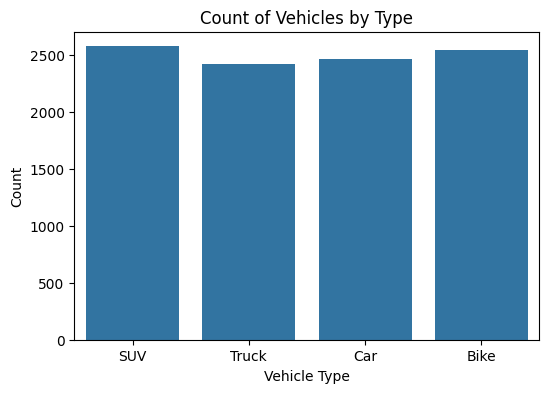

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle_Type')
plt.title("Count of Vehicles by Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


# **📅 3. Entry Hour Distribution**

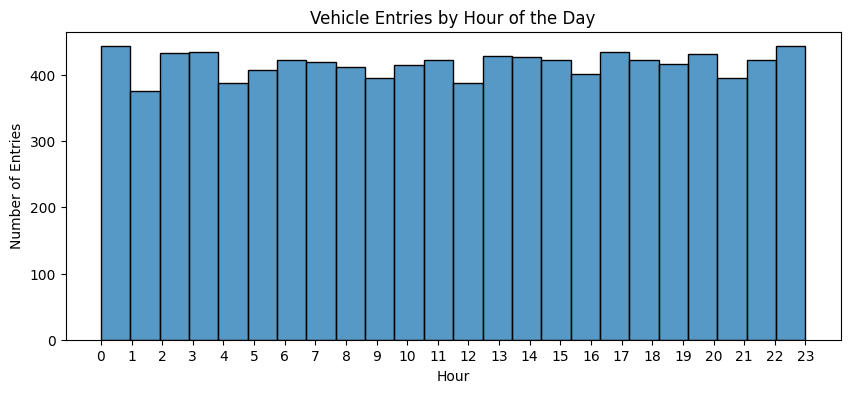

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['entry_hour'], bins=24, kde=False)
plt.title("Vehicle Entries by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Entries")
plt.xticks(range(0, 24))
plt.show()


# **📆 4. Entries on Weekdays vs Weekends**

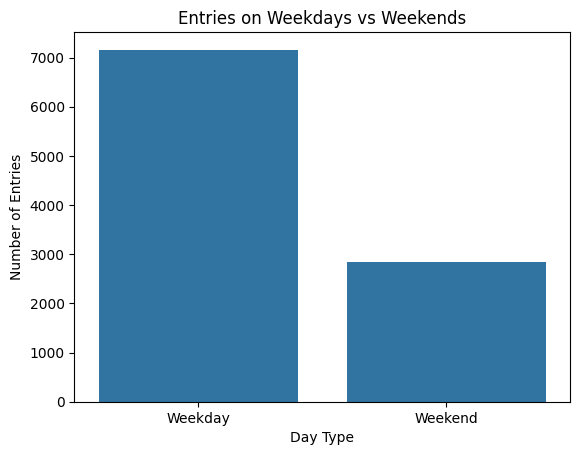

In [15]:
sns.countplot(data=df, x='is_weekend_entry')
plt.title("Entries on Weekdays vs Weekends")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel("Number of Entries")
plt.xlabel("Day Type")
plt.show()


# **⏱️ 5. Parking Duration Distribution**

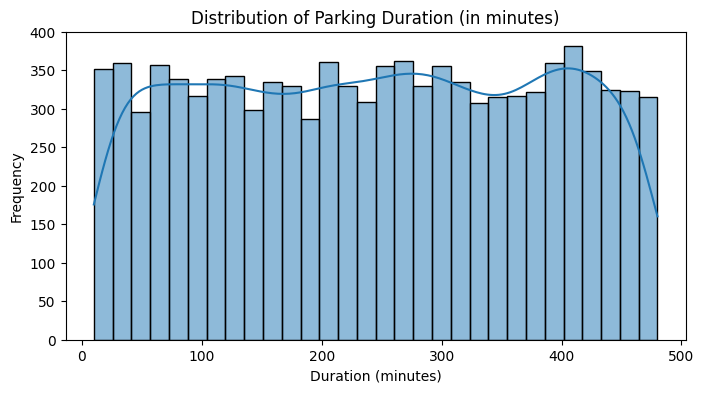

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['Duration_Minutes'], bins=30, kde=True)
plt.title("Distribution of Parking Duration (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()




**💰 Revenue by Parking Level**

<ipython-input-21-db7650ffe22d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Parking_Level', y='Amount_Charged', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


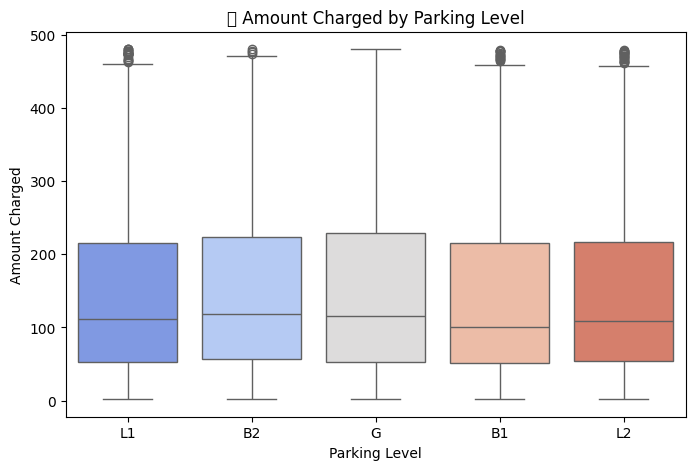

In [21]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Parking_Level', y='Amount_Charged', palette='coolwarm')
plt.title("💵 Amount Charged by Parking Level")
plt.xlabel("Parking Level")
plt.ylabel("Amount Charged")
plt.show()


# **🛠️ 1. Prepare the Dataset**

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define target (assume available if duration < 10 mins or Payment_Status is 'Unpaid')
df['is_available'] = df['Payment_Status'].apply(lambda x: 1 if x == 'Unpaid' else 0)

# Encode categorical features
le_vehicle = LabelEncoder()
le_level = LabelEncoder()

df['Vehicle_Type_enc'] = le_vehicle.fit_transform(df['Vehicle_Type'])
df['Parking_Level_enc'] = le_level.fit_transform(df['Parking_Level'])

# Features and target
features = ['entry_hour', 'entry_day_of_week', 'is_weekend_entry', 'Vehicle_Type_enc', 'Parking_Level_enc']
X = df[features]
y = df['is_available']


# **🤖 2. Train Model**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.5085
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1025
           1       0.50      0.51      0.50       975

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



# **📥 3. Predict from User Input**

In [25]:
# Function to predict availability from user input
def predict_availability(hour, day_of_week, is_weekend, vehicle_type, parking_level):
    vehicle_encoded = le_vehicle.transform([vehicle_type])[0]
    level_encoded = le_level.transform([parking_level])[0]

    input_data = [[hour, day_of_week, is_weekend, vehicle_encoded, level_encoded]]
    prediction = model.predict(input_data)[0]

    return "✅ Slot likely AVAILABLE" if prediction == 1 else "❌ Slot likely NOT available"

# Example Usage
# Input: 10 AM, Monday, Not weekend, 'Car', 'L1'
print(predict_availability(10, 0, 0, 'Car', 'L1'))


❌ Slot likely NOT available


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# *📊 1. Import Metrics and Evaluate*

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy Score:", round(accuracy_score(y_test, y_pred), 2))

# Precision
print("🎯 Precision Score:", round(precision_score(y_test, y_pred), 2))

# Recall
print("📢 Recall Score:", round(recall_score(y_test, y_pred), 2))

# F1 Score
print("📐 F1 Score:", round(f1_score(y_test, y_pred), 2))

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.51
🎯 Precision Score: 0.5
📢 Recall Score: 0.51
📐 F1 Score: 0.5

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1025
           1       0.50      0.51      0.50       975

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



# **🔍 2. Confusion Matrix Visualization**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


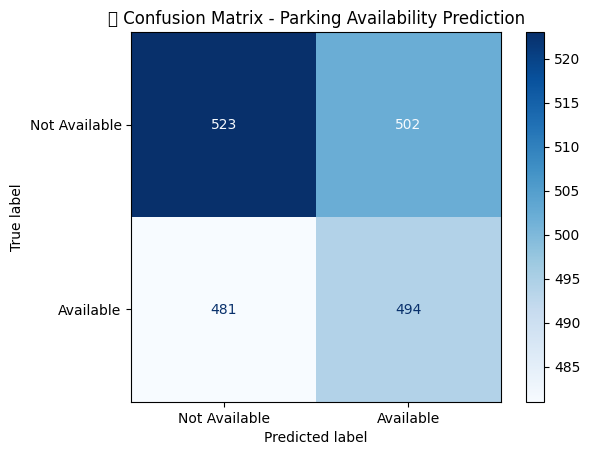

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Available", "Available"])
disp.plot(cmap="Blues", values_format='d')
plt.title("📉 Confusion Matrix - Parking Availability Prediction")
plt.show()
